<a href="https://colab.research.google.com/github/Nannanpeng/Macro-I/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive/Macro_I")

Mounted at /content/drive


# Question 1
Finite periods with instantaneous utility function $u(c) = ln(c)$

In [ ]:
a_0 = 0
T = 69 
S = T+1 # from 0 to T. So T + 1 periods in total
beta = 1.0
R = np.ones(S)
grid = 6001
amax = 13
amin = -3

w = np.zeros(S)
w[:10] = 0.5
w[10:50] = 1
w[50:] = 0 

In [ ]:
class hhDecision:
    def utility(self, c):
        return np.log(c)
    
    def consumption(self, w, R, a_t, a_t_next):
        consum = w + R*a_t - a_t_next
        return consum

class hhDP:
    def __init__(self, hhD, a_0_ = a_0, S_ = S, 
                 beta_ = beta, R_ = R, grid_ = grid, 
                 amax_ = amax, amin_ = amin, w_ = w):
        self.a_0_ = a_0_
        self.S_ = S_
        self.beta_ = beta_
        self.R_ = R_
        self.grid_ = grid_
        self.amax_ = amax_
        self.amin_ = amin_
        self.w_ = w_
        self.hhD = hhD
    
    def initilization(self):
        self.a_grids = np.linspace(self.amin_, self.amax_, self.grid_)
        self.P = np.empty((self.grid_, self.S_))
        self.V = np.empty_like(self.P)
        self.C = np.empty_like(self.P)
        self.a_tplus1_grids, self.a_t_grids = np.meshgrid(self.a_grids, self.a_grids)
    
    def last_period(self, t):
        self.C[:, t] =  self.hhD.consumption(self.w_[t], self.R_[t], self.a_grids, 0)
        pos_ind = self.C[:, t] > 0
        self.V[pos_ind, t] = self.hhD.utility(self.C[:, t][pos_ind])
        self.V[~pos_ind, t] = -np.inf
        self.P[:, t] = 0

    def other_periods(self, t):
        consum_mat = self.hhD.consumption(self.w_[t], self.R_[t], self.a_t_grids, self.a_tplus1_grids)
        current_u = np.empty_like(consum_mat)
        pos_ind = consum_mat > 0
        current_u[pos_ind] = self.hhD.utility(consum_mat[pos_ind])
        current_u[~pos_ind] = -np.inf
        tot_u = current_u + self.beta_*self.V[:, t+1]
        self.V[:, t] = np.max(tot_u, axis=1)
        self.P[:, t] = self.a_grids[np.argmax(tot_u, axis=1)] 
        self.C[:, t] = self.hhD.consumption(self.w_[t], self.R_[t], self.a_grids, self.P[:, t])
    
    def update(self):
        self.initilization()
        for t in list(range(self.S_))[::-1]:
            if t == self.S_ - 1:
                self.last_period(t)
            else:
                self.other_periods(t)
    
    def find_opt_path(self):
        c_path = np.zeros(self.S_)
        c_path2 = np.zeros(self.S_)
        a_path = np.zeros(self.S_+1)
        for t in range(self.S_):
            a_path[t+1] = self.P[np.argmin(np.abs(self.a_grids - a_path[t])), t]
            c_path[t] = self.C[np.argmin(np.abs(self.a_grids - a_path[t])), t]
        return a_path, c_path

without social security

In [ ]:
hhD = hhDecision()
dp1 = hhDP(hhD)
dp1.update()
a_path_1, c_path_1 = dp1.find_opt_path()

with tax and social security

In [ ]:
w2 = np.copy(w)
tau = 0.25
retired_income = 0.625
w2[:10] = 0.5 - tau
w2[10:50] = 1 - tau
w2[50:] = retired_income

dp2 = hhDP(hhD, w_= w2, amin_ = -5, amax_ = 10)
dp2.update()

In [ ]:
a_path_2, c_path_2 = dp2.find_opt_path()

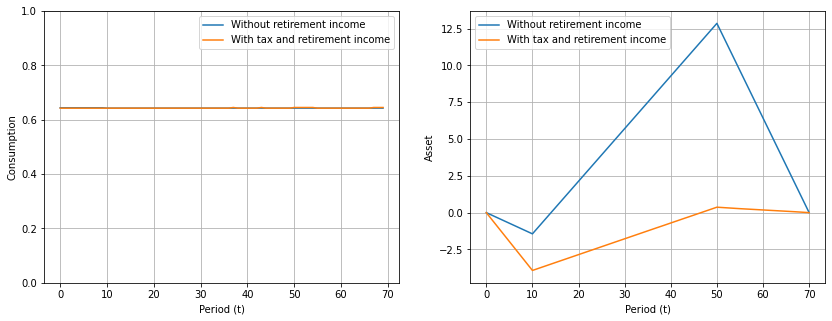

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_save_paths = [ [c_path_1, c_path_2],  
                      [a_path_1, a_path_2] ]
labels = ['Without retirement income', 'With tax and retirement income']
ytitles = ['Consumption', 'Asset']
for ax, consum_save, ytitle in zip(axes, consum_save_paths, ytitles):
    for path, label in zip(consum_save, labels):
        ax.plot(path, label=label)
    ax.grid()
    ax.legend()
    ax.set(xlabel='Period (t)', ylabel=ytitle)
axes[0].set_ylim([0, 1])

fig.savefig('HW3_Q1.png', dpi=300)

# Question 2 

Baseline with borrowing constraint

In [ ]:
dp3 = hhDP(hhD, w_= w, amin_=-2, amax_=15)
dp3.update()
a_path_3, c_path_3 = dp3.find_opt_path()

Tax and retirement income with borrowing constraint

In [ ]:
dp4 = hhDP(hhD, w_= w2, amin_ = -2, amax_ = 13)
dp4.update()
a_path_4, c_path_4 = dp4.find_opt_path()

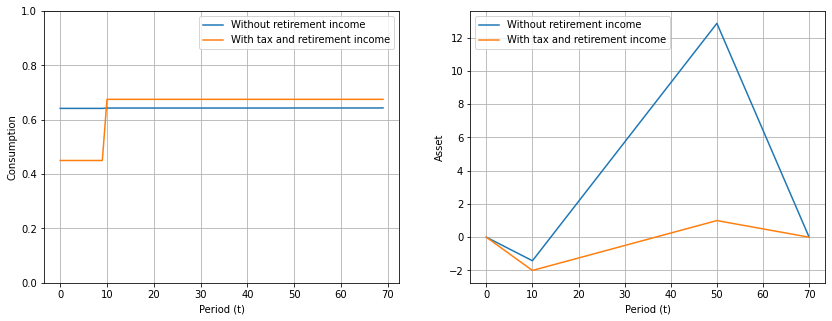

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_save_paths = [ [c_path_3, c_path_4],  
                      [a_path_3, a_path_4] ]
labels = ['Without retirement income', 'With tax and retirement income']
ytitles = ['Consumption', 'Asset']
for ax, consum_save, ytitle in zip(axes, consum_save_paths, ytitles):
    for path, label in zip(consum_save, labels):
        ax.plot(path, label=label)
    ax.grid()
    ax.legend()
    ax.set(xlabel='Period (t)', ylabel=ytitle)
axes[0].set_ylim([0, 1]);

fig.savefig('HW3_Q2.png', dpi=300)

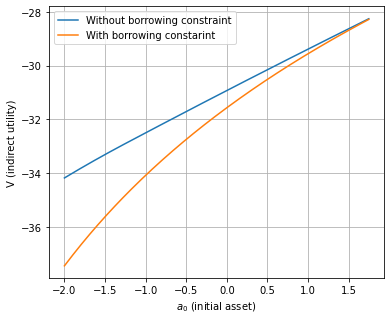

In [ ]:
n = 1500
xval = dp2.a_grids[dp2.a_grids>=-2][:n]
yval_1 = dp2.V[dp2.a_grids>=-2, 0][:n]
yval_2 = dp4.V[:n, 0]
y_pts_1 = yval_1[np.argmin(np.abs(xval))]
y_pts_2 = yval_2[np.argmin(np.abs(xval))]

plt.figure(figsize = (6, 5))
plt.plot(xval, yval_1, label='Without borrowing constraint')
plt.plot(xval, yval_2, label='With borrowing constarint')
plt.grid()
plt.legend()
plt.xlabel('$a_0$ (initial asset)')
plt.ylabel('V (indirect utility)');

plt.savefig('HW3_Q2_valFun.png', dpi=300)

# Question 3

Fixed interest rate

In [ ]:
beta_new = 0.96
R_new_1 = np.full_like(R, 1.05)
R_new_2 = np.copy(R_new_1)
R_new_2[20:] = 1.02

w_new = np.copy(w)
w_new[:10] = 0.25

dp5 = hhDP(hhD, w_= w_new, amin_=-5, amax_=15, R_ = R_new_1, beta_= beta_new)
dp5.update()
a_path_5, c_path_5 = dp5.find_opt_path()

In [ ]:
dp6 = hhDP(hhD, w_= w_new, amin_=-8, amax_=12, R_ = R_new_2, beta_= beta_new)
dp6.update()
a_path_6, c_path_6 = dp6.find_opt_path()

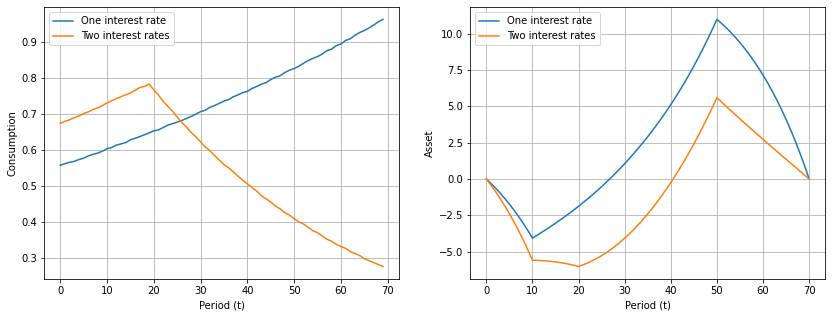

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_save_paths = [ [c_path_5, c_path_6],  
                      [a_path_5, a_path_6] ]
labels = ['One interest rate', 'Two interest rates']
ytitles = ['Consumption', 'Asset']
for ax, consum_save, ytitle in zip(axes, consum_save_paths, ytitles):
    for path, label in zip(consum_save, labels):
        ax.plot(path, label=label)
    ax.grid()
    ax.legend()
    ax.set(xlabel='Period (t)', ylabel=ytitle);

fig.savefig('HW3_Q3.png', dpi=300)

# Question 4

Baseline: without interest gap

In [ ]:
T = 39 
S = T+1 # from 0 to T. So T + 1 periods in total
beta = 1.0/1.05
R = np.full(S, 1.05)
amax = 7
amin = -4

w = np.zeros(S)
w[:10] = 0.5
w[10:30] = 1
w[30:] = 0 

hhD = hhDecision()
dp7 = hhDP(hhD, S_=S, beta_=beta, w_=w,
           R_ = R, amax_=amax, amin_=amin)
dp7.update()
a_path_7, c_path_7 = dp7.find_opt_path()

With interest gap

In [ ]:
class hhDecisionNew(hhDecision):
    def consumption(self, w, R, a_t, a_t_next):
        R_b, R_s = R
        indicator = a_t >= 0
        consum = w + (R_b + (R_s - R_b)*indicator)*a_t - a_t_next
        return consum

In [ ]:
R_b = 1.09
R_s = 1.01
R_bs = np.full((S, 2), [R_b, R_s])

hhD_new = hhDecisionNew()
dp8 = hhDP(hhD_new, S_=S, beta_=beta, w_=w,
           R_ = R_bs, amax_=amax, amin_=amin)
dp8.update()
a_path_8, c_path_8 = dp8.find_opt_path()

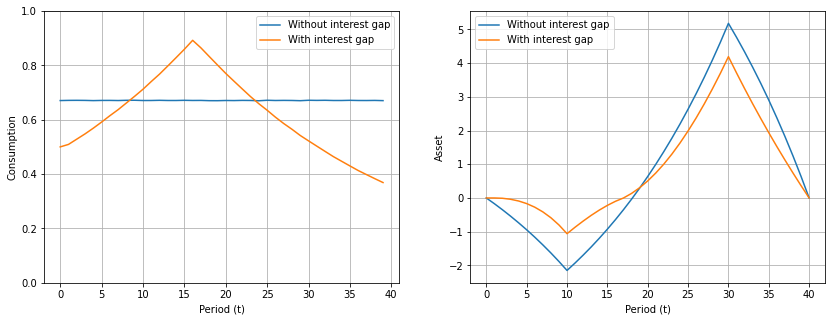

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_save_paths = [ [c_path_7, c_path_8],  
                      [a_path_7, a_path_8] ]
labels = ['Without interest gap', 'With interest gap']
ytitles = ['Consumption', 'Asset']
for ax, consum_save, ytitle in zip(axes, consum_save_paths, ytitles):
    for path, label in zip(consum_save, labels):
        ax.plot(path, label=label)
    ax.grid()
    ax.legend()
    ax.set(xlabel='Period (t)', ylabel=ytitle)
axes[0].set_ylim([0, 1]);

fig.savefig('HW3_Q4.png', dpi=300)